(6000, 28, 28)
(1000, 28, 28)
(6000,)


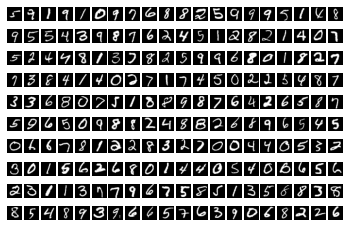

(6000, 28, 28, 1)
(6000, 10)


In [3]:
# Import libraries and modules 
# Import libraries and modules 
import numpy as np 
import time 
np.random.seed(123) 
# for reproducibility

from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix

import tensorflow as tf 
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import Conv2DTranspose, Reshape, Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D, Input 
from utilitaire import affiche

################################################## 
# I - Load pre-shuffled MNIST data train and test sets
################################################## 
from tensorflow.keras.datasets.mnist import load_data 
from matplotlib import pyplot 
# load dataset 
(X_train, y_train), (X_test, y_test) = load_data() 
X_train, pipo, y_train, pipo = train_test_split(X_train, y_train, test_size=0.9) 
X_test, pipo, y_test, pipo = train_test_split(X_test, y_test, test_size=0.9) 

# reponses
print(X_train.shape) # 6000 images d'apprentissage
print(X_test.shape)  # 1000 images de test
print(y_train.shape) # y_train (6000,1)
# la taille des images 28*28
# il y a 10 classes d'images

for i in range(200): 
    plt.subplot(10,20,i+1)
    plt.imshow(X_train[i,:].reshape([28,28]), cmap='gray') 
    plt.axis('off') 
plt.show() 

# Preprocess input data 
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1) 
X_test = X_test.reshape(X_test.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32') 
X_train /= 255 
X_test /= 255 
print(X_train.shape)

# le pretraitement des données sert à ?????

# Preprocess class labels 
Y_train = tf.keras.utils.to_categorical(y_train, 10)
print(Y_train.shape)  # Y_train (6000,10) 6000 echantillons et 10 classes
Y_test = tf.keras.utils.to_categorical(y_test, 10)

# tf.keras.utils.to_categorical Converts a class vector (integers) to binary class matrix


In [4]:
def affiche(history): 
  # summarize history for accuracy 
  plt.plot(history.history['acc']) 
  plt.plot(history.history['val_acc']) 
  plt.title('model accuracy') 
  plt.ylabel('accuracy') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left')
  plt.show() 
  # summarize history for loss 
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss']) 
  plt.title('model loss') 
  plt.ylabel('loss') 
  plt.xlabel('epoch') 
  plt.legend(['train', 'test'], loc='upper left') 
  plt.show()

In [5]:
inputs = Input(shape=(28,28,1)) 
x = inputs 
print(x.shape) #(None,28,28,1)
x=Flatten()(x) 
print(x.shape) #(None,784)
# flatten -> on passe d'une image 2D 28.28 à une image 1D (vecteur) 784

outputs=Dense(10, activation='softmax')(x)  # declaration d'une couche Dense( nbr_neurones, activation_fct)
model = Model(inputs, outputs) 
model.summary()

# on utilise la fonction softmax prcq on a 10 classes donc on aura 10 neurones de sortie, softmax est utilisé pour
# de la multi-classification en couche de sortie
# fct d'activation: Elle va permettre le passage d’information ou non de l’information si le seuil de stimulation 
# est atteint. Concrètement, elle va avoir pour rôle de décider si on active ou non une réponse du neurone

# y= w.x+b, x=28*28 , on a 10 neurones de sorties-> le nombre de parametres a determiner est 28.28.10+10

# a voir: model zoo, yolo, tensorboard, distill.pub->momentum??

(None, 28, 28, 1)
(None, 784)
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  del sys.path[0]


Epoch 1/10
24/24 [==============================] - 3s 10ms/step - loss: 1.6691 - accuracy: 0.5302 - val_loss: 0.8039 - val_accuracy: 0.8320
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.7657 - accuracy: 0.8280 - val_loss: 0.6134 - val_accuracy: 0.8590
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.6064 - accuracy: 0.8527 - val_loss: 0.5389 - val_accuracy: 0.8650
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.5277 - accuracy: 0.8685 - val_loss: 0.4983 - val_accuracy: 0.8770
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4986 - accuracy: 0.8754 - val_loss: 0.4706 - val_accuracy: 0.8770
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4665 - accuracy: 0.8796 - val_loss: 0.4500 - val_accuracy: 0.8770
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4369 - accuracy: 0.8859 - val_loss: 0.4351 - val_accuracy: 0.8820
Epoch 8/10
24/24 [=

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  app.launch_new_instance()


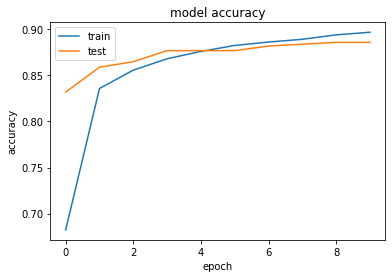

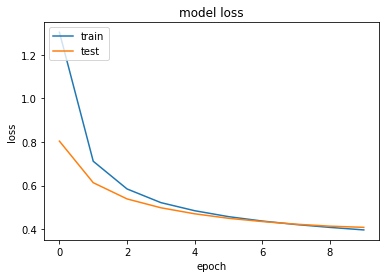

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 2.251307999999998


In [6]:
lr= 0.2  # entre 10^(-2) et 1 , learning rate: paramètre de réglage dans un algorithme d'optimisation qui détermine 
         # la taille du pas à chaque itération tout en se déplaçant vers un minimum d'une fonction de perte

batch_size=256 # sous ensemble de la base d'apprentissage
epochs=10      # nombre de fois que tous les exemples sont vus en apprentissage

sgd1= tf.keras.optimizers.SGD(learning_rate=lr, momentum=0.0) 

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy']) 
# categorical_crossentropy :is a loss function that is used in multi-class classification tasks. These are tasks where
# an example can only belong to one out of many possible categories, and the model must decide which one

tps1 = time.clock() 
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test)) 
# model.fit pour l'apprentissage de notre model
tps2 = time.clock() 

from utilitaire import affiche 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

In [7]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test loss:', score[0]) 
print('Test accuracy:', score[1]*100) 
y_pred = model.predict(X_test) # donne toutes les probabilités d'appartenir à chaque classe 
print(y_pred[1,:])
y_pred = y_pred.argmax(axis=-1) # donne la classe avec la plus grande probabilité
print(y_pred[1])
print('Confusion Matrix')
print(confusion_matrix(y_test, y_pred))

Test loss: 0.40845051407814026
Test accuracy: 88.59999775886536
[5.5474648e-03 1.4622817e-04 6.7433168e-04 6.2542951e-01 6.5641473e-03
 3.2728791e-01 1.3240728e-02 1.2356859e-03 1.6028151e-02 3.8458428e-03]
3
Confusion Matrix
[[ 84   0   1   0   0   0   0   0   0   0]
 [  0 109   0   1   0   0   1   0   2   0]
 [  0   1  87   0   4   0   3   3   8   1]
 [  0   0   2  92   0   3   1   1   2   0]
 [  0   0   1   0  83   0   1   0   3   8]
 [  0   2   0   5   0  67   1   3   8   2]
 [  2   1   0   0   0   2 100   1   0   0]
 [  0   2   2   1   1   0   0  94   1   5]
 [  0   1   0   6   2   1   0   1  80   1]
 [  2   2   0   0   7   1   0   3   1  90]]


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


24/24 [==============================] - 0s 10ms/step - loss: 1.6495 - accuracy: 0.5181 - val_loss: 0.6494 - val_accuracy: 0.8500
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.5891 - accuracy: 0.8589 - val_loss: 0.5034 - val_accuracy: 0.8660
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.4478 - accuracy: 0.8763 - val_loss: 0.4412 - val_accuracy: 0.8740
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3931 - accuracy: 0.8862 - val_loss: 0.3752 - val_accuracy: 0.9000
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3442 - accuracy: 0.9076 - val_loss: 0.4015 - val_accuracy: 0.8830
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3112 - accuracy: 0.9152 - val_loss: 0.3363 - val_accuracy: 0.9070
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3048 - accuracy: 0.9146 - val_loss: 0.3365 - val_accuracy: 0.8990
Epoch 8/10
24/24 [============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


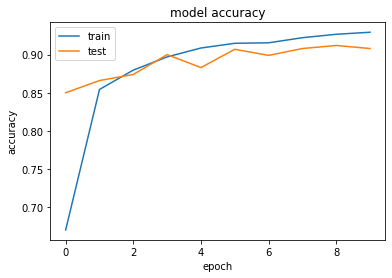

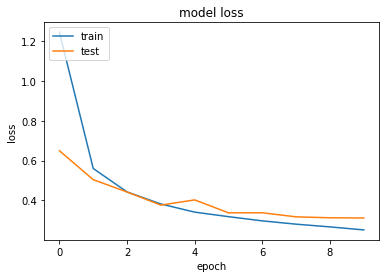

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 1.745678999999999


In [8]:
# ajouter une couche caché
couche_1=Dense(256,activation='relu')(x)
out=Dense(10, activation='softmax')(couche_1)

new_model = Model(inputs=model.input, outputs=out)
new_model.summary()

new_model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =new_model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


24/24 [==============================] - 0s 10ms/step - loss: 1.3764 - accuracy: 0.5664 - val_loss: 0.4754 - val_accuracy: 0.8850
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.4839 - accuracy: 0.8634 - val_loss: 0.3783 - val_accuracy: 0.8960
Epoch 3/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3847 - accuracy: 0.8908 - val_loss: 0.3503 - val_accuracy: 0.9040
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3554 - accuracy: 0.8978 - val_loss: 0.3092 - val_accuracy: 0.9150
Epoch 5/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3228 - accuracy: 0.9080 - val_loss: 0.3080 - val_accuracy: 0.9120
Epoch 6/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2852 - accuracy: 0.9198 - val_loss: 0.2961 - val_accuracy: 0.9160
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2843 - accuracy: 0.9136 - val_loss: 0.2792 - val_accuracy: 0.9210
Epoch 8/10
24/24 [============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


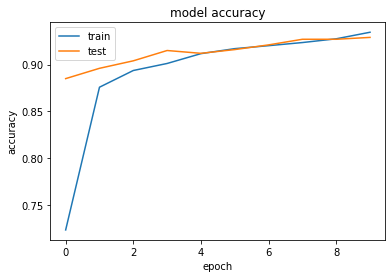

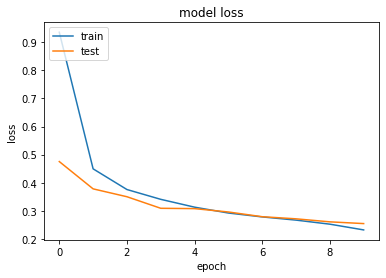

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 1.7407839999999979


In [9]:
# ajouter une couche dropout
drop=Dropout(0.25)(couche_1)
out_1=Dense(10, activation='softmax')(drop)

new_model_1 = Model(inputs=model.input, outputs=out_1)
new_model_1.summary()

new_model_1.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =new_model_1.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                2570      
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_____________________________________________________

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  # Remove the CWD from sys.path while we load stuff.


24/24 [==============================] - 1s 10ms/step - loss: 1.2615 - accuracy: 0.6067 - val_loss: 0.4092 - val_accuracy: 0.8900
Epoch 2/10
24/24 [==============================] - 0s 5ms/step - loss: 0.3797 - accuracy: 0.8841 - val_loss: 0.3032 - val_accuracy: 0.9110
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2901 - accuracy: 0.9161 - val_loss: 0.2623 - val_accuracy: 0.9240
Epoch 4/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2563 - accuracy: 0.9199 - val_loss: 0.2603 - val_accuracy: 0.9260
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2520 - accuracy: 0.9227 - val_loss: 0.2523 - val_accuracy: 0.9220
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.2205 - accuracy: 0.9296 - val_loss: 0.2292 - val_accuracy: 0.9350
Epoch 7/10
24/24 [==============================] - 0s 5ms/step - loss: 0.2104 - accuracy: 0.9367 - val_loss: 0.2353 - val_accuracy: 0.9360
Epoch 8/10
24/24 [============

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if sys.path[0] == '':


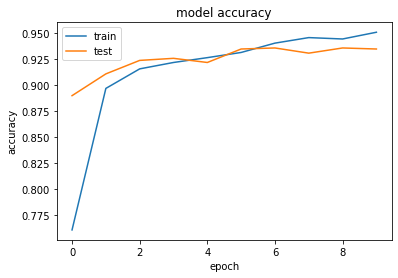

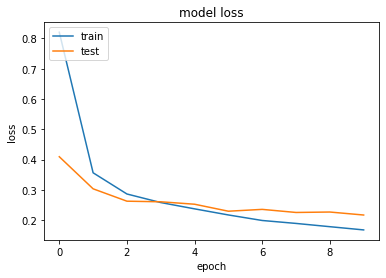

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 1.7546710000000019


In [10]:
# ajouter une deuxième couche 
couche_2=Dense(256, activation='relu')(drop) # le dropout pour minimiser l'overfitting
out_2=Dense(10, activation='softmax')(couche_2)

new_model_2 = Model(inputs=model.input, outputs=out_2)
new_model_2.summary()

new_model_2.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =new_model_2.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 256)               3211520   
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0   

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


24/24 [==============================] - 1s 24ms/step - loss: 2.0586 - accuracy: 0.3421 - val_loss: 1.0717 - val_accuracy: 0.5960
Epoch 2/10
24/24 [==============================] - 0s 17ms/step - loss: 1.1459 - accuracy: 0.6278 - val_loss: 0.5944 - val_accuracy: 0.7890
Epoch 3/10
24/24 [==============================] - 0s 16ms/step - loss: 0.5880 - accuracy: 0.8085 - val_loss: 0.4192 - val_accuracy: 0.8760
Epoch 4/10
24/24 [==============================] - 0s 16ms/step - loss: 0.3791 - accuracy: 0.8763 - val_loss: 0.3301 - val_accuracy: 0.8970
Epoch 5/10
24/24 [==============================] - 0s 15ms/step - loss: 0.2792 - accuracy: 0.9121 - val_loss: 0.3052 - val_accuracy: 0.9070
Epoch 6/10
24/24 [==============================] - 0s 15ms/step - loss: 0.2543 - accuracy: 0.9155 - val_loss: 0.2236 - val_accuracy: 0.9330
Epoch 7/10
24/24 [==============================] - 0s 16ms/step - loss: 0.1739 - accuracy: 0.9454 - val_loss: 0.1870 - val_accuracy: 0.9380
Epoch 8/10
24/24 [======

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


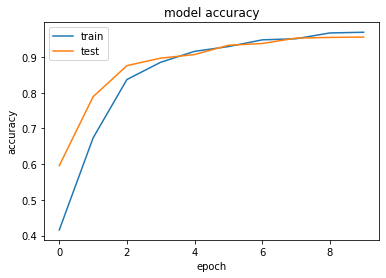

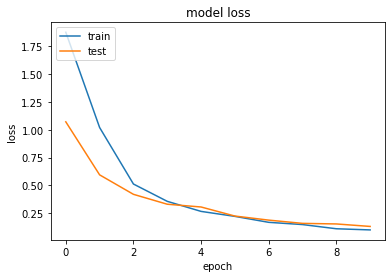

lr= 0.2 batch_size= 256 epochs= 10
Temps d apprentissage 3.8303909999999988


In [15]:
# CNN , ajout de couche convolutionnelle
# rmq: la convolution se fait pour des entree 2d donc ajouter l'instruction avant le flatten!

inputs = Input(shape=(28,28,1)) 
x = inputs 
x=Convolution2D(32,(3,3),activation='relu',padding='same')(x)
x=Convolution2D(64,(3,3),activation='relu',padding='same')(x)
x=MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid")(x)
x=Flatten()(x) 

couche1=Dense(256,activation='relu')(x)
drop=Dropout(0.25)(couche1)
couche2=Dense(256, activation='relu')(drop)

outputs=Dense(10, activation='softmax')(couche2)  # declaration d'une couche Dense( nbr_neurones, activation_fct)

model = Model(inputs, outputs) 
model.summary()

model.compile(loss='categorical_crossentropy', optimizer=sgd1, metrics=['accuracy'])

tps1 = time.clock()
history =model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs,verbose=1,validation_data=(X_test, Y_test))
tps2 = time.clock() 

affiche(history) #donnee en annexe 
print('lr=',lr,'batch_size=',batch_size, 'epochs=',epochs) 
print('Temps d apprentissage',tps2 - tps1)